In [1]:
library(ggplot2) # Data visualization
library(readr) # CSV file I/O, e.g. the read_csv function
library(gridExtra)
library(grid)
library(plyr)

# Load the dataset
iris=read.csv('../input/Iris.csv')


# First let's get a random sampling of the data
iris[sample(nrow(iris),10),]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
57,57,6.3,3.3,4.7,1.6,Iris-versicolor
108,108,7.3,2.9,6.3,1.8,Iris-virginica
58,58,4.9,2.4,3.3,1.0,Iris-versicolor
10,10,4.9,3.1,1.5,0.1,Iris-setosa
18,18,5.1,3.5,1.4,0.3,Iris-setosa
123,123,7.7,2.8,6.7,2.0,Iris-virginica
125,125,6.7,3.3,5.7,2.1,Iris-virginica
31,31,4.8,3.1,1.6,0.2,Iris-setosa
64,64,6.1,2.9,4.7,1.4,Iris-versicolor


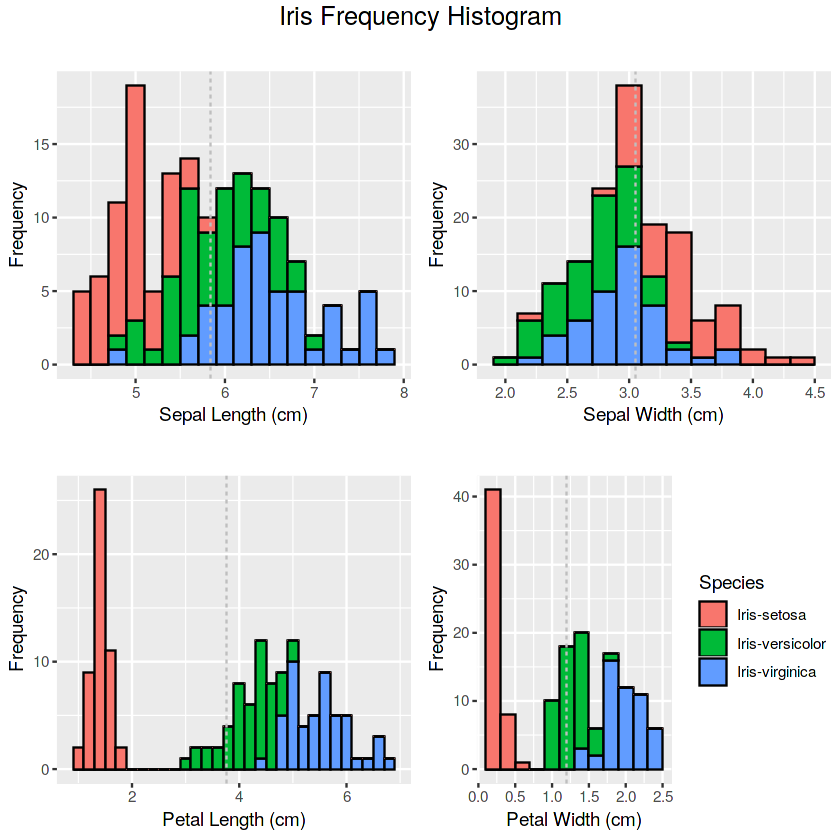

In [2]:
# Density & Frequency analysis - Histogram

# Sepal length 
HisSl <- ggplot(data=iris, aes(x=SepalLengthCm))+
  geom_histogram(binwidth=0.2, color="black", aes(fill=Species)) + 
  xlab("Sepal Length (cm)") +  
  ylab("Frequency") + 
  theme(legend.position="none")+
  ggtitle("Histogram of Sepal Length")+
  geom_vline(data=iris, aes(xintercept = mean(SepalLengthCm)),linetype="dashed",color="grey")


# Sepal width
HistSw <- ggplot(data=iris, aes(x=SepalWidthCm)) +
  geom_histogram(binwidth=0.2, color="black", aes(fill=Species)) + 
  xlab("Sepal Width (cm)") +  
  ylab("Frequency") + 
  theme(legend.position="none")+
  ggtitle("Histogram of Sepal Width")+
  geom_vline(data=iris, aes(xintercept = mean(SepalWidthCm)),linetype="dashed",color="grey")


# Petal length
HistPl <- ggplot(data=iris, aes(x=PetalLengthCm))+
  geom_histogram(binwidth=0.2, color="black", aes(fill=Species)) + 
  xlab("Petal Length (cm)") +  
  ylab("Frequency") + 
  theme(legend.position="none")+
  ggtitle("Histogram of Petal Length")+
  geom_vline(data=iris, aes(xintercept = mean(PetalLengthCm)),
             linetype="dashed",color="grey")



# Petal width
HistPw <- ggplot(data=iris, aes(x=PetalWidthCm))+
  geom_histogram(binwidth=0.2, color="black", aes(fill=Species)) + 
  xlab("Petal Width (cm)") +  
  ylab("Frequency") + 
  theme(legend.position="right" )+
  ggtitle("Histogram of Petal Width")+
  geom_vline(data=iris, aes(xintercept = mean(PetalWidthCm)),linetype="dashed",color="grey")


# Plot all visualizations
grid.arrange(HisSl + ggtitle(""),
             HistSw + ggtitle(""),
             HistPl + ggtitle(""),
             HistPw  + ggtitle(""),
             nrow = 2,
             top = textGrob("Iris Frequency Histogram", 
                            gp=gpar(fontsize=15))
)

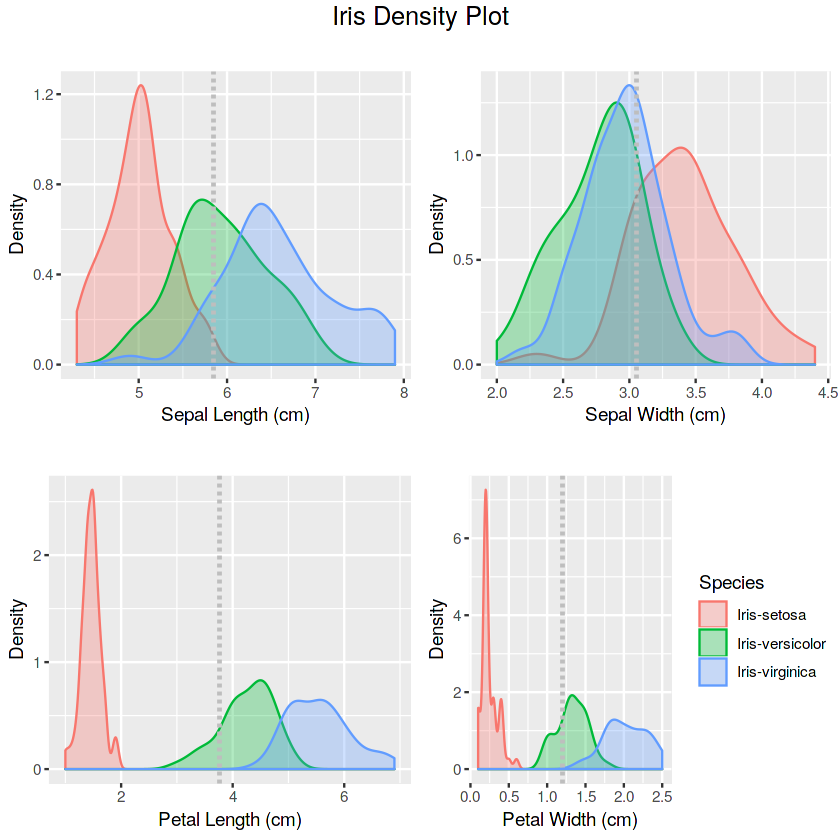

In [3]:
# Density plot

DhistPl <-    ggplot(iris, aes(x=PetalLengthCm, colour=Species, fill=Species)) +
  geom_density(alpha=.3) +
  geom_vline(aes(xintercept=mean(PetalLengthCm),  colour=Species),linetype="dashed",color="grey", size=1)+
  xlab("Petal Length (cm)") +  
  ylab("Density")+
  theme(legend.position="none")

DhistPw <- ggplot(iris, aes(x=PetalWidthCm, colour=Species, fill=Species)) +
  geom_density(alpha=.3) +
  geom_vline(aes(xintercept=mean(PetalWidthCm),  colour=Species),linetype="dashed",color="grey", size=1)+
  xlab("Petal Width (cm)") +  
  ylab("Density")
  


DhistSw <- ggplot(iris, aes(x=SepalWidthCm, colour=Species, fill=Species)) +
  geom_density(alpha=.3) +
  geom_vline(aes(xintercept=mean(SepalWidthCm),  colour=Species), linetype="dashed",color="grey", size=1)+
  xlab("Sepal Width (cm)") +  
  ylab("Density")+
  theme(legend.position="none")


DhistSl <- ggplot(iris, aes(x=SepalLengthCm, colour=Species, fill=Species)) +
  geom_density(alpha=.3) +
  geom_vline(aes(xintercept=mean(SepalLengthCm),  colour=Species),linetype="dashed", color="grey", size=1)+
  xlab("Sepal Length (cm)") +  
  ylab("Density")+
  theme(legend.position="none")


# Plot all density visualizations
grid.arrange(DhistSl + ggtitle(""),
             DhistSw  + ggtitle(""),
             DhistPl + ggtitle(""),
             DhistPw  + ggtitle(""),
             nrow = 2,
             top = textGrob("Iris Density Plot", 
                            gp=gpar(fontsize=15))
)

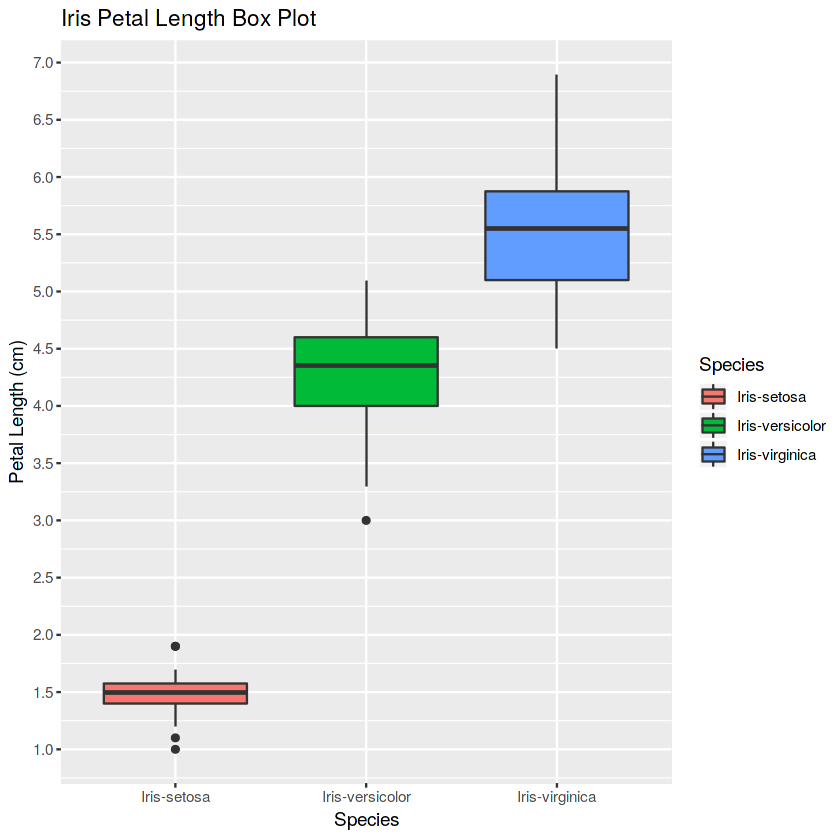

In [4]:
# Boxplot - Petal length vs Species

ggplot(iris, aes(Species, PetalLengthCm, fill=Species)) + 
  geom_boxplot()+
  scale_y_continuous("Petal Length (cm)", breaks= seq(0,30, by=.5))+
  labs(title = "Iris Petal Length Box Plot", x = "Species")

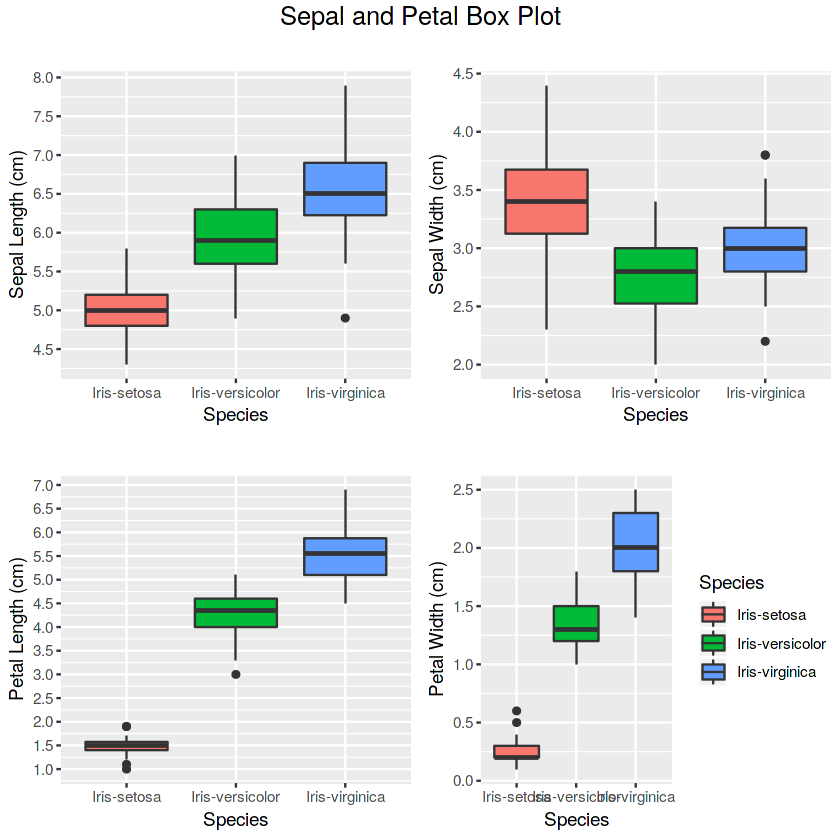

In [5]:
# Boxplot

BpSl <- ggplot(iris, aes(Species, SepalLengthCm, fill=Species)) + 
        geom_boxplot()+
        scale_y_continuous("Sepal Length (cm)", breaks= seq(0,30, by=.5))+
        theme(legend.position="none")



BpSw <-  ggplot(iris, aes(Species, SepalWidthCm, fill=Species)) + 
          geom_boxplot()+
          scale_y_continuous("Sepal Width (cm)", breaks= seq(0,30, by=.5))+
          theme(legend.position="none")



BpPl <- ggplot(iris, aes(Species, PetalLengthCm, fill=Species)) + 
        geom_boxplot()+
        scale_y_continuous("Petal Length (cm)", breaks= seq(0,30, by=.5))+
        theme(legend.position="none")
        


BpPw <-  ggplot(iris, aes(Species, PetalWidthCm, fill=Species)) + 
        geom_boxplot()+
        scale_y_continuous("Petal Width (cm)", breaks= seq(0,30, by=.5))+
        labs(title = "Iris Box Plot", x = "Species")



# Plot all visualizations
grid.arrange(BpSl  + ggtitle(""),
             BpSw  + ggtitle(""),
             BpPl + ggtitle(""),
             BpPw + ggtitle(""),
             nrow = 2,
             top = textGrob("Sepal and Petal Box Plot", 
                            gp=gpar(fontsize=15))
)

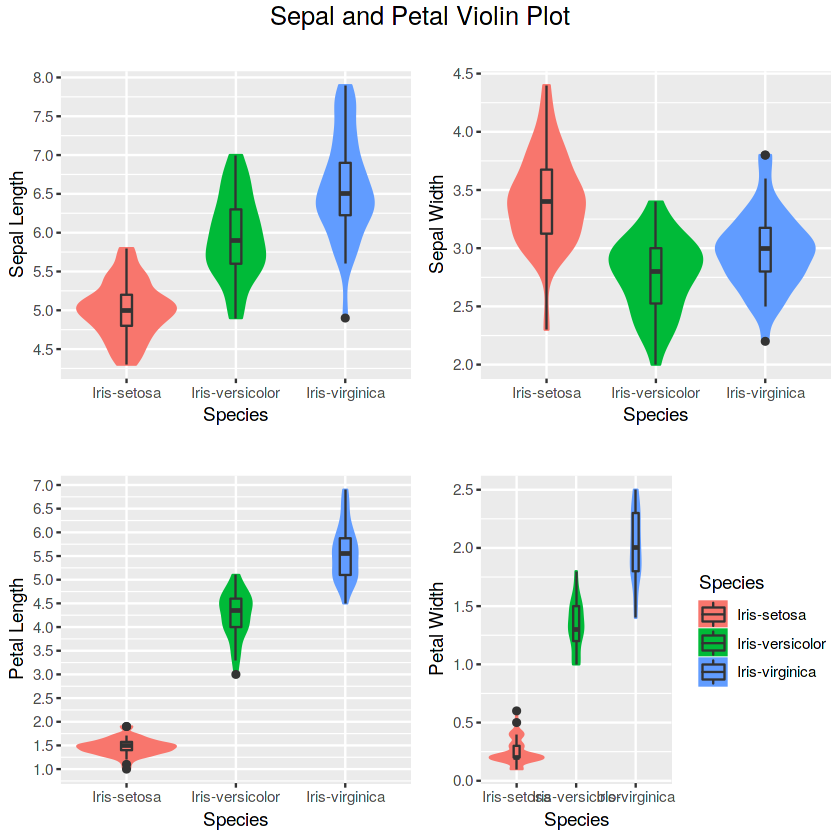

In [6]:
# Violin plot - Shows mean, median for interquartile range with width of the shape representing the number of points at a particular value by width of the shapes

VpSl <-  ggplot(iris, aes(Species, SepalLengthCm, fill=Species)) + 
        geom_violin(aes(color = Species), trim = T)+
        scale_y_continuous("Sepal Length", breaks= seq(0,30, by=.5))+
        geom_boxplot(width=0.1)+
        theme(legend.position="none")

VpSw <-  ggplot(iris, aes(Species, SepalWidthCm, fill=Species)) + 
        geom_violin(aes(color = Species), trim = T)+
        scale_y_continuous("Sepal Width", breaks= seq(0,30, by=.5))+
        geom_boxplot(width=0.1)+
        theme(legend.position="none")
  


VpPl <-  ggplot(iris, aes(Species, PetalLengthCm, fill=Species)) + 
        geom_violin(aes(color = Species), trim = T)+
        scale_y_continuous("Petal Length", breaks= seq(0,30, by=.5))+
        geom_boxplot(width=0.1)+
        theme(legend.position="none")
        



VpPw <-  ggplot(iris, aes(Species, PetalWidthCm, fill=Species)) + 
        geom_violin(aes(color = Species), trim = T)+
        scale_y_continuous("Petal Width", breaks= seq(0,30, by=.5))+
        geom_boxplot(width=0.1)+
        labs(title = "Iris Box Plot", x = "Species")
  

# Plot all visualizations
grid.arrange(VpSl  + ggtitle(""),
             VpSw  + ggtitle(""),
             VpPl + ggtitle(""),
             VpPw + ggtitle(""),
             nrow = 2,
             top = textGrob("Sepal and Petal Violin Plot", 
                            gp=gpar(fontsize=15))
)

Loading required package: carData


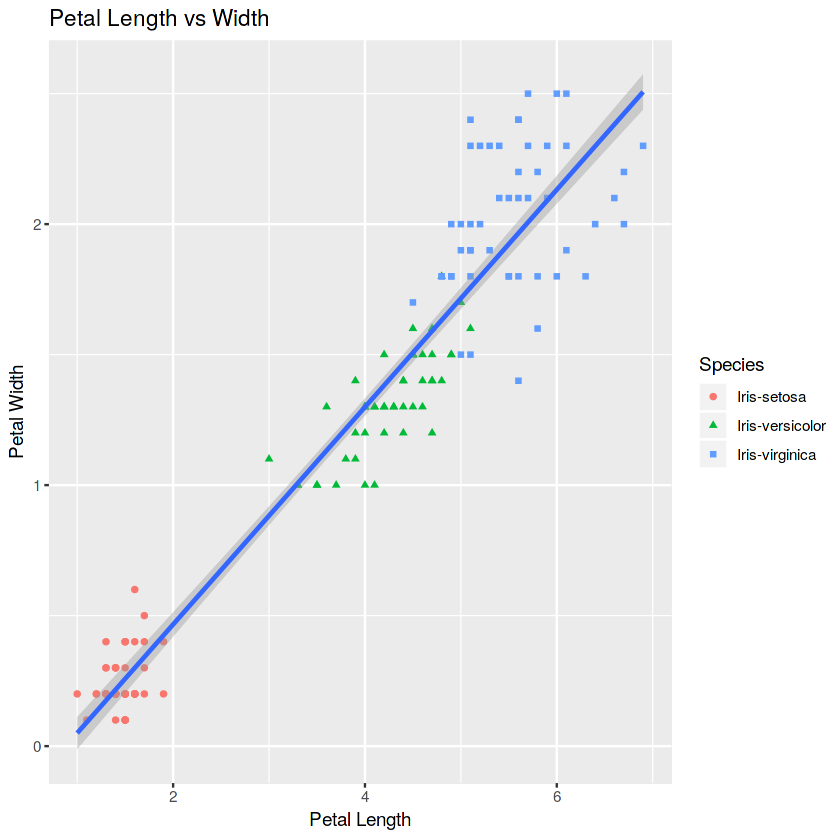

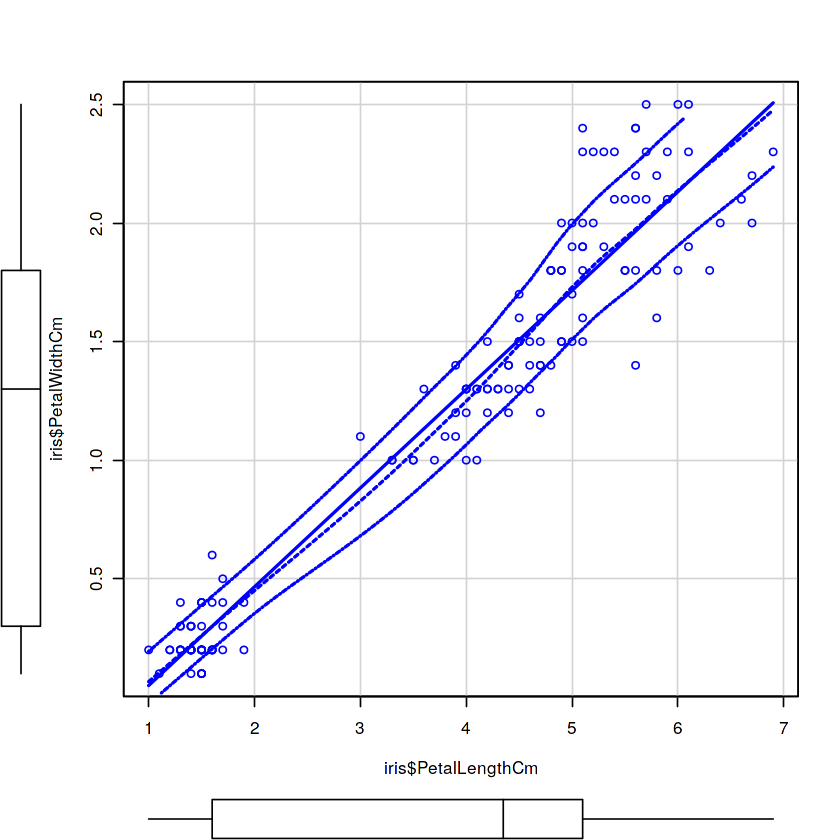

In [7]:
# Scatterplot

ggplot(data = iris, aes(x = PetalLengthCm, y = PetalWidthCm))+
  xlab("Petal Length")+
  ylab("Petal Width") +
  geom_point(aes(color = Species,shape=Species))+
  geom_smooth(method='lm')+
  ggtitle("Petal Length vs Width")

library(car)
scatterplot(iris$PetalLengthCm,iris$PetalWidthCm)

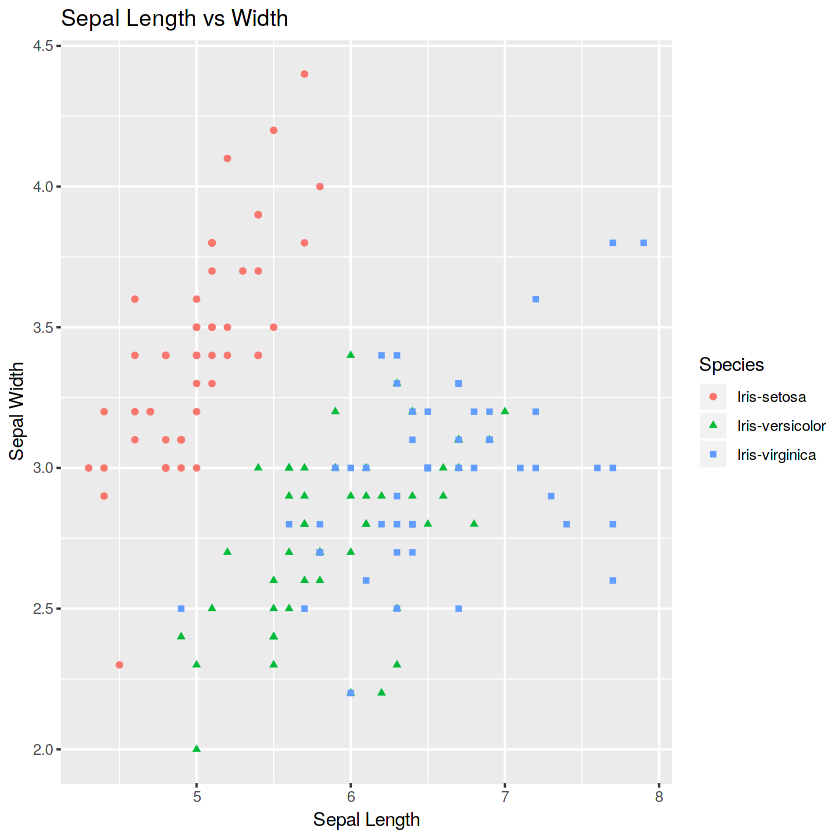

In [8]:
# Scatterplot - Sepal Length vs Width
ggplot(data=iris, aes(x = SepalLengthCm, y = SepalWidthCm)) +
  geom_point(aes(color=Species, shape=Species)) +
  xlab("Sepal Length") + 
  ylab("Sepal Width") +
  ggtitle("Sepal Length vs Width")


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


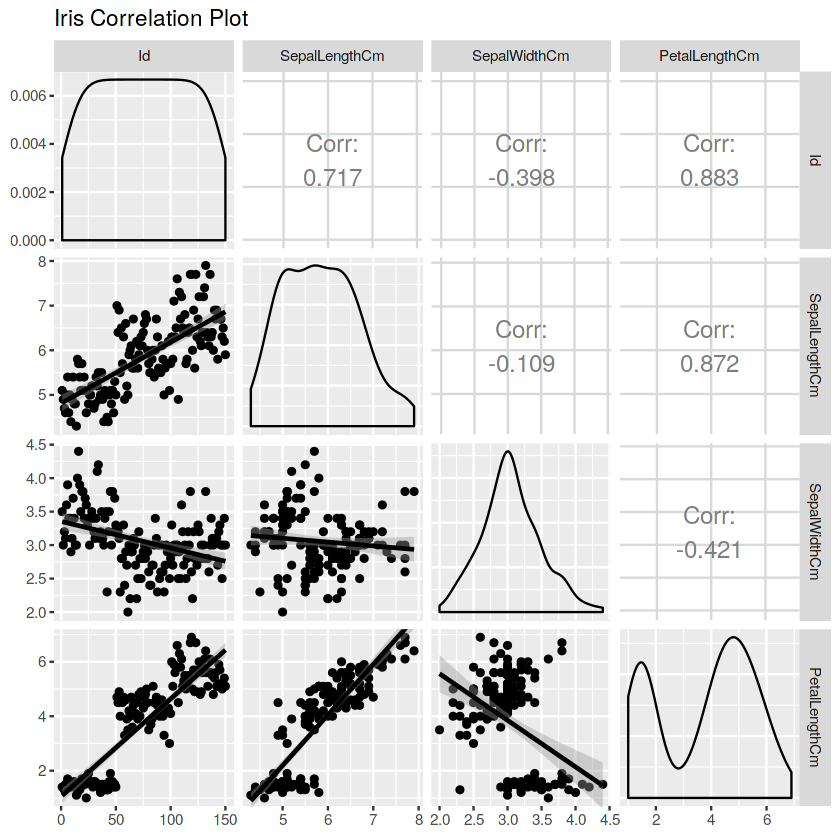

In [9]:
# Pairwise correlation

library(GGally)
ggpairs(data = iris[1:4],
        title = "Iris Correlation Plot",
        upper = list(continuous = wrap("cor", size = 5)), 
        lower = list(continuous = "smooth")
)

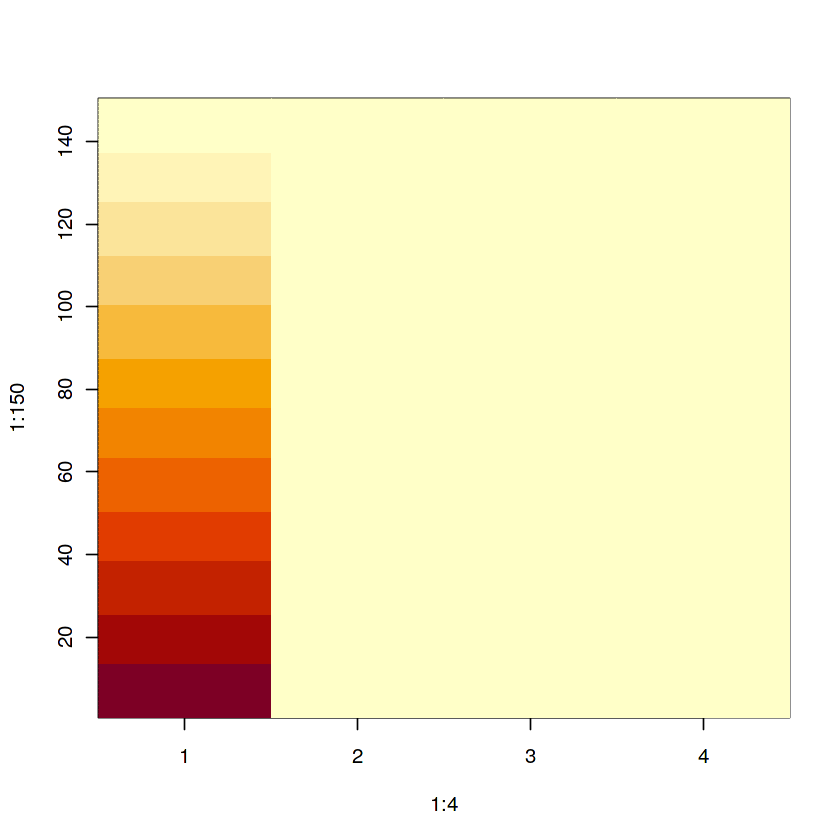

In [10]:
# Heatmap
irisMatix <- as.matrix(iris[1:150, 1:4])
irisTransposedMatrix <- t(irisMatix)[,nrow(irisMatix):1]

image(1:4, 1:150, irisTransposedMatrix)